In [59]:
import pandas as pd
#df = pd.read_csv('../CSD20_Resident_Data_Phase_1.csv')
population_year = pd.read_csv('../Raochuan/population_2010_accurate.csv')
population_2000 = pd.read_csv('../11-15/2000_age.csv')

In [3]:
brooklyn_population = population_year[population_year['Unnamed: 0']=='Brooklyn']

In [154]:
brooklyn_population.iloc[21]

Unnamed: 0                                   Brooklyn
2010 Census Tract                                  36
Total Population    21 Years    and Under         734
Under 1 Year                                       54
1 & 2 Years                                        93
3 & 4 Years                                        89
5 Years                                            41
6 Years                                            30
7 to 9 Years                                       86
10 & 11 Years                                      52
12 & 13 Years                                      46
14 Years                                           33
15 Years                                           42
16 Years                                           32
17 Years                                           27
18 Years                                           32
19 Years                                           33
20 Years                                           27
21 Years                    

In [151]:
df.iloc[310]

2010 Census Tract          36
School Year          20102011
Grade Level                 4
Count of Students          21
Name: 310, dtype: object

In [155]:
import numpy as np
import matplotlib.pyplot as plt
x = brooklyn_population.iloc[21][6:19].values
x = [x[0],x[1], x[2]/3,x[2]/3,x[2]/3,x[4]]

In [136]:
x

[25, 23, 13.666666666666666, 13.666666666666666, 13.666666666666666, 19]

In [156]:
df_slice = df[df['2010 Census Tract'] ==36]
df_slice = df_slice[df_slice['School Year'] == 20102011]
y= df_slice['Count of Students'].values
y

array([30, 28, 22, 23, 21, 10])

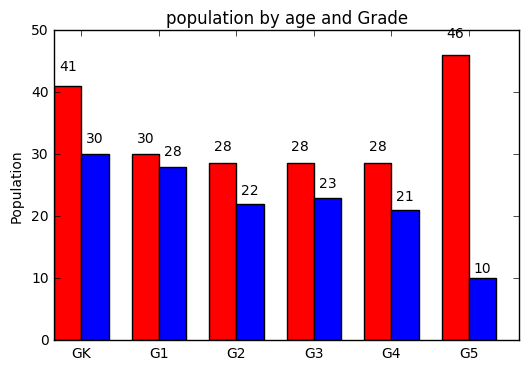

In [157]:
%matplotlib inline
ind = np.arange(6)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, x, width, color='r')#, yerr=menStd)
rects2 = ax.bar(ind + width, y ,width, color ='b')
ax.set_xticks(ind + width)
ax.set_ylabel('Population')
ax.set_title('population by age and Grade')
ax.set_xticks(ind + width)
ax.set_xticklabels(('GK','G1', 'G2', 'G3', 'G4', 'G5'))
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
plt.show()

In [172]:

for year in np.unique(df['School Year'].values):
    slice_df = df[df['School Year']==year]
    for grade in ['K','1','2','3','4','5']:
        slice_df = slice_df[slice_df['Grade Level']==grade]
        sum(slice_df['Count of Students'])

In [171]:
slice_df = df[df['School Year']==20102011]
slice_df = slice_df[slice_df['Grade Level']=='1']
slice_df

,2010 Census Tract,School Year,Grade Level,Count of Students
67,20,20102011,1,5
127,22,20102011,1,54
187,30,20102011,1,11
247,34,20102011,1,25
307,36,20102011,1,28
367,38,20102011,1,6
427,44,20102011,1,23
487,46,20102011,1,11
547,50,20102011,1,24
608,54,20102011,1,7


In [46]:
brooklyn_population[brooklyn_population['2010 Census Tract']==100]

,Unnamed: 0,2010 Census Tract,Total Population 21 Years and Under,Under 1 Year,1 & 2 Years,3 & 4 Years,5 Years,6 Years,7 to 9 Years,10 & 11 Years,12 & 13 Years,14 Years,15 Years,16 Years,17 Years,18 Years,19 Years,20 Years,21 Years
0,Brooklyn,100,586,49,95,67,35,31,80,50,40,10,25,12,28,11,19,19,15


In [14]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate


def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, bw=bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print ("Package Versions:")
import sklearn; print ("  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print ("  statsmodels:", statsmodels.__version__)

Package Versions:
  scikit-learn: 0.17.1
  scipy: 0.18.1
  statsmodels: 0.6.1


In [ ]:
import matplotlib.pyplot as plt
pdf = kde_funcs[1](x, x_grid, bandwidth=0.3)
ax[i,j].plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)

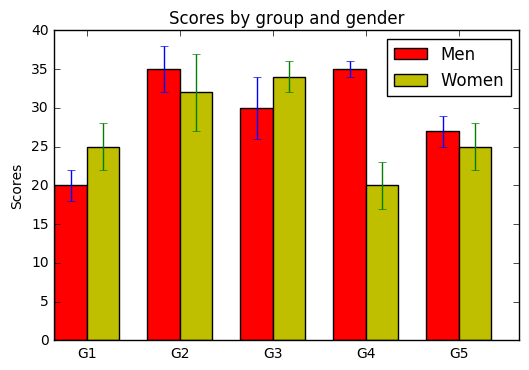

In [84]:
N = 5
menMeans = (20, 35, 30, 35, 27)
menStd = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)
womenMeans = (25, 32, 34, 20, 25)
womenStd = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, womenMeans, width, color='y', yerr=womenStd)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))



In [5]:
brooklyn_population.head()

,Unnamed: 0,2010 Census Tract,Total Population 21 Years and Under,Under 1 Year,1 & 2 Years,3 & 4 Years,5 Years,6 Years,7 to 9 Years,10 & 11 Years,12 & 13 Years,14 Years,15 Years,16 Years,17 Years,18 Years,19 Years,20 Years,21 Years
0,Brooklyn,1.00,586,49,95,67,35,31,80,50,40,10,25,12,28,11,19,19,15
1,Brooklyn,2.00,589,27,56,66,36,32,57,49,33,17,25,26,31,22,35,38,39
2,Brooklyn,3.01,685,68,116,112,36,31,97,42,38,16,21,19,23,17,11,20,18
3,Brooklyn,5.01,"1,267",49,69,64,29,24,56,29,22,15,8,18,12,174,306,270,122
4,Brooklyn,5.02,292,34,40,36,15,14,35,14,25,10,8,7,16,8,10,12,8


In [ ]:
def SE(t,Census_Tract):
    SC1 = brooklyn_population[brooklyn_population['2010 Census Tract']==Census_Tract][:,2][0]
    SC1 = int(SC1)
    NC1 = 0
    for i in brooklyn_population['Total Population    21 Years    and Under'].values:
        i = i.replace(',','')
        i = int(i)
        NC1 = NC1 + i
    ratio1 = SC1/NC1
    SC2 = population_2000[population_2000['Unnamed: 0']==Census_Tract][:,2][0]
    NC2 =
    ratio2 = SC2/NC2
    SE = (ratio1 -ratio2)/ 10 * (t-2010) + ration1
    NP = 
    SE = SE * NP
    return SE
    

In [52]:
def F(SE(t,Census_Tract)):
    p = 0
    for Census_Tract in :
        p = p + SE(t,Census_Tract)
    
    p = p * (NP/NP_0)
    round(p) - 

In [53]:
sum

736722

In [50]:
'1,267'.replace(',','')

'1267'

In [63]:
population_2000.head()

,Unnamed: 0,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
0,18.0,5.0,1.0,0.0,17.0,176.0,295.0,310.0,241.0,171.0,115.0,57.0,32.0,14.0,5.0,1.0,1.0,0.0,1.0
1,20.0,142.0,137.0,108.0,137.0,168.0,164.0,155.0,113.0,121.0,79.0,65.0,44.0,37.0,38.0,36.0,9.0,9.0,12.0
2,22.0,307.0,298.0,273.0,291.0,313.0,333.0,327.0,312.0,288.0,272.0,222.0,168.0,157.0,129.0,172.0,124.0,89.0,165.0
3,30.0,130.0,116.0,102.0,80.0,118.0,149.0,143.0,147.0,162.0,140.0,129.0,96.0,85.0,85.0,63.0,65.0,23.0,40.0
4,34.0,167.0,137.0,123.0,129.0,132.0,224.0,288.0,253.0,229.0,221.0,209.0,162.0,131.0,119.0,122.0,104.0,74.0,70.0


In [66]:
brooklyn = pd.read_csv('Brooklyn_Age_Group_2011_2015.csv')

In [67]:
brooklyn

,Unnamed: 0,2015,2014,2013,2012,2011,Unnamed: 6
0,0-5,200391.860,199256.268,191819.026,187291.355,182350.440,NaN
1,5-9,166114.305,167794.752,163305.387,164200.640,159556.635,NaN
2,10-14,155567.365,152063.994,155528.940,153938.100,157023.990,NaN
3,15-19,147657.160,149442.201,152936.791,156503.735,162089.280,NaN
4,20-24,184571.450,188769.096,194411.175,200119.530,200078.955,NaN
5,25-29,250489.825,243826.749,238477.708,233472.785,227938.050,NaN
6,30-34,229395.945,228095.991,222924.814,215513.340,210209.535,NaN
7,35-39,197755.125,191390.889,186634.728,179594.450,179817.795,NaN
8,40-44,168751.040,170416.545,171081.834,169331.910,164621.925,NaN
9,45-49,160840.835,159929.373,160713.238,161635.005,162089.280,NaN
